<a href="https://colab.research.google.com/github/sudhirshahu51/RAG/blob/main/Using_Multiple_Tools_for_data_source.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Source](https://github.com/krishnaik06/Updated-Langchain/blob/main/agents/agents.ipynb)

[Video](https://www.youtube.com/watch?v=XXa82wxzKuA)

In [2]:
!pip install arxiv --quiet
!pip install langchain_core
#!pip install langchain-objectbox

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 1.8 MB/s eta 0:00:00


In [3]:
#importing from differvent version as version compatible to huggingface_hub is giving error
from langchain.tools.retriever import create_retriever_tool #creating a tool over retriever

In [4]:
%%writefile requirements.txt

langchain_openai
python-dotenv
streamlit
langchain_community
langserve
fastapi
uvicorn
sse_starlette
bs4
pypdf
chromadb
faiss-cpu
groq
cassio
beautifulsoup4
langchain-groq
wikipedia
arxiv
langchainhub
sentence_transformers
PyPDF2
langchain-huggingface
huggingface_hub

Writing requirements.txt


In [5]:
!pip install -r requirements.txt

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 6.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 57.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 67.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 52.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 628.3/628.3 kB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [6]:
from langchain_huggingface import HuggingFaceEndpoint

In [7]:
from google.colab import userdata
key = userdata.get('HUGGING_FACE')

In [8]:
import os
os.environ['HUGGINGFACEHUB_API_TOKEN'] = key

In [9]:

repo_id="mistralai/Mistral-7B-Instruct-v0.3"
#repo_id = 'meta-llama/Llama-3.1-8B'
llm=HuggingFaceEndpoint(repo_id=repo_id,temperature=0.7, max_new_tokens=300, huggingfacehub_api_token=key)
print(llm)

HuggingFaceEndpoint
Params: {'endpoint_url': None, 'task': None, 'model_kwargs': {}}


In [10]:
print(llm.invoke('What is Gen AI?'))



Gen AI, or General Artificial Intelligence, refers to a type of artificial intelligence that can perform any intellectual task that a human can. Unlike Narrow AI, which is designed to perform a specific task, Gen AI can learn, adapt, and solve problems in a variety of contexts. It is often described as having the ability to think, learn, and understand like a human. However, it's important to note that we have not yet developed Gen AI, and it remains a topic of active research and debate in the field of artificial intelligence.

Some researchers believe that Gen AI could revolutionize many industries, including healthcare, finance, and transportation, by automating complex tasks and making decisions based on data and insights that humans might not have access to. Others are concerned about the ethical and societal implications of Gen AI, such as job displacement, privacy concerns, and the potential for misuse. As such, the development and deployment of Gen AI is a topic of ongoing di

Model

In [11]:
from langchain_community.tools import WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper


In [12]:
api_wrapper=WikipediaAPIWrapper(top_k_results=1,doc_content_chars_max=200)
wiki=WikipediaQueryRun(api_wrapper=api_wrapper)

In [13]:
wiki.name

'wikipedia'

In [14]:
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.document_loaders import PyPDFLoader
from langchain_community.vectorstores import FAISS
from langchain_community.embeddings import HuggingFaceBgeEmbeddings
from langchain_text_splitters import RecursiveCharacterTextSplitter


In [15]:
loader=WebBaseLoader("https://docs.smith.langchain.com/")
loader = PyPDFLoader('/content/drive/MyDrive/Colab Notebooks/Data/LangSmith.pdf')
docs=loader.load()

In [16]:
docs[0]

Document(metadata={'source': '/content/drive/MyDrive/Colab Notebooks/Data/LangSmith.pdf', 'page': 0}, page_content="Quick Start\nGet started with LangSmith\nLangSmith is a platform for building production-grade LLM applications. It allows you to\nclosely monitor and evaluate your application, so you can ship quickly and with\nconfidence. With LangSmith you can:\nTrace LLM Applications\ue092 Gain visibility into LLM calls and other parts of your\napplication's logic.\nEvaluate Performance\ue092 Compare results across models, prompts, and architectures to\nidentify what works best.\nImprove Prompts\ue092 Quickly refine prompts to achieve more accurate and reliable\nresults.\nLANGSMITH + LANGCHAIN OSS\nLangSmith integrates seamlessly with LangChain's open source frameworks\nlangchain and langgraph, with no extra instrumentation needed.\nIf you're already using either of these, see the how-to guide for setting up LangSmith\nwith LangChain or setting up LangSmith with LangGraph.\nLangSmith 

In [17]:
documents=RecursiveCharacterTextSplitter(chunk_size=1000,chunk_overlap=200).split_documents(docs)
# Try with multiple documents too

In [18]:
documents[1]

Document(metadata={'source': '/content/drive/MyDrive/Colab Notebooks/Data/LangSmith.pdf', 'page': 0}, page_content="with LangChain or setting up LangSmith with LangGraph.\nLangSmith is a standalone platform that can be used on it's own no matter how you're\ncreating your LLM applicatons.\nIn this tutorial, we'll walk you though logging your first trace in LangSmith using the\nLangSmith SDK and running an evaluation to measure the performance of your application.\nThis example uses the OpenAI API, however you can use your provider of choice.\n1. Install LangSmith\nP yt h o n T yp eS c r i p t \n2. Create an API key\npip install -U langsmith openai\n12/17/24, 1:35 PM Get started with LangSmith | 🦜🛠  LangSmith\nhttps://docs.smith.langchain.com 1/4")

In [19]:
#Try different splitter like from llamaindex, node level approch.
vectordb=FAISS.from_documents(documents,HuggingFaceBgeEmbeddings())
retriever=vectordb.as_retriever() #Retriever is kind of interface over vector database.
retriever

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: LangChainDeprecationWarning: Default values for HuggingFaceBgeEmbeddings.model_name were deprecated in LangChain 0.2.5 and will be removed in 0.4.0. Explicitly pass a model_name to the HuggingFaceBgeEmbeddings constructor instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/90.3k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/720 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/366 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/191 [00:00<?, ?B/s]

VectorStoreRetriever(tags=['FAISS', 'HuggingFaceBgeEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x7ea3d9708d60>, search_kwargs={})

In [20]:
from langchain.tools.retriever import create_retriever_tool #creating a tool over retriever
retriever_tool=create_retriever_tool(retriever,"langsmith_search",
                      "Search for information about LangSmith. For any questions about LangSmith, you must use this tool!")

In [21]:
#from langchain.agents.agent_toolkits import create_retriever_tool
#retriever_tool=create_retriever_tool(retriever,"langsmith_search",
                      #"Search for information about LangSmith. For any questions about LangSmith, you must use this tool!")

In [22]:
retriever_tool.name

'langsmith_search'

In [23]:
## Arxiv Tool
from langchain_community.utilities import ArxivAPIWrapper #Utilities are the integrations with third-part systems and packages.
from langchain_community.tools import ArxivQueryRun

arxiv_wrapper=ArxivAPIWrapper(top_k_results=1, doc_content_chars_max=200)
arxiv=ArxivQueryRun(api_wrapper=arxiv_wrapper)
arxiv.name

'arxiv'

In [24]:
tools=[wiki,arxiv,retriever_tool]

In [25]:
for tool in tools:
  print(tool.name)

wikipedia
arxiv
langsmith_search


In [26]:
# from dotenv import load_dotenv
# load_dotenv()
# import os
# os.environ['OPENAI_API_KEY']=os.getenv("OPENAI_API_KEY")
# from langchain_openai import ChatOpenAI
# #Use Instead Llama here.
# llm = ChatOpenAI(model="gpt-3.5-turbo-0125", temperature=0)

In [27]:
prompt_template="""
Use the following piece of context to answer the question asked.
Please try to provide the answer only based on the context

{context}
Question:{question}

Helpful Answers:
 """

In [28]:
from langchain import hub
# Get the prompt template to use from hub - you can modify this!
prompt = hub.pull("hwchase17/openai-functions-agent")
prompt.messages

/usr/local/lib/python3.10/dist-packages/langsmith/client.py:261: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(


[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=[], input_types={}, partial_variables={}, template='You are a helpful assistant'), additional_kwargs={}),
 MessagesPlaceholder(variable_name='chat_history', optional=True),
 HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['input'], input_types={}, partial_variables={}, template='{input}'), additional_kwargs={}),
 MessagesPlaceholder(variable_name='agent_scratchpad')]

In [29]:
!pip install langgraph --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 3.6 MB/s eta 0:00:00


In [32]:
from langchain_huggingface import ChatHuggingFace
chat_model = ChatHuggingFace(llm=llm)

tokenizer_config.json:   0%|          | 0.00/141k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/587k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

In [ ]:
from langchain_core.messages import HumanMessage

In [31]:
### Agents
#from langchain.agents import create_openai_tools_agent
#agent=create_openai_tools_agent(llm, tools, prompt)

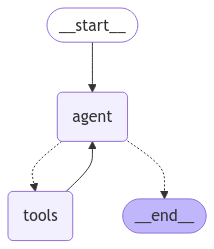

In [40]:
agent_executor

In [51]:

#Agent
model_with_tools = chat_model.bind_tools(tools)



[WikipediaQueryRun(api_wrapper=WikipediaAPIWrapper(wiki_client=<module 'wikipedia' from '/usr/local/lib/python3.10/dist-packages/wikipedia/__init__.py'>, top_k_results=1, lang='en', load_all_available_meta=False, doc_content_chars_max=200)),
 ArxivQueryRun(api_wrapper=ArxivAPIWrapper(arxiv_search=<class 'arxiv.Search'>, arxiv_exceptions=(<class 'arxiv.ArxivError'>, <class 'arxiv.UnexpectedEmptyPageError'>, <class 'arxiv.HTTPError'>), top_k_results=1, ARXIV_MAX_QUERY_LENGTH=300, continue_on_failure=False, load_max_docs=100, load_all_available_meta=False, doc_content_chars_max=200)),
 Tool(name='langsmith_search', description='Search for information about LangSmith. For any questions about LangSmith, you must use this tool!', args_schema=<class 'langchain_core.tools.retriever.RetrieverInput'>, func=functools.partial(<function _get_relevant_documents at 0x7ea4e1f10430>, retriever=VectorStoreRetriever(tags=['FAISS', 'HuggingFaceBgeEmbeddings'], vectorstore=<langchain_community.vectorstores

In [54]:
response = model_with_tools.invoke([HumanMessage(content="What is wikipedia?")])
print(f"ContentString: {response.content}")
print(f"ToolCalls: {response.tool_calls}")

ContentString: 
ToolCalls: [{'name': 'wikipedia', 'args': {'query': 'What is Wikipedia?'}, 'id': '0', 'type': 'tool_call'}]


In [55]:
response

AIMessage(content='', additional_kwargs={'tool_calls': [ChatCompletionOutputToolCall(function=ChatCompletionOutputFunctionDefinition(arguments={'query': 'What is Wikipedia?'}, name='wikipedia', description=None), id='0', type='function')]}, response_metadata={'token_usage': ChatCompletionOutputUsage(completion_tokens=20, prompt_tokens=429, total_tokens=449), 'model': '', 'finish_reason': 'stop'}, id='run-31253434-1b32-4455-9923-4c3100e93060-0', tool_calls=[{'name': 'wikipedia', 'args': {'query': 'What is Wikipedia?'}, 'id': '0', 'type': 'tool_call'}])

In [45]:
response

AIMessage(content='', additional_kwargs={'tool_calls': [ChatCompletionOutputToolCall(function=ChatCompletionOutputFunctionDefinition(arguments={'query': 'query to look up on wikipedia'}, name='wikipedia', description=None), id='0', type='function')]}, response_metadata={'token_usage': ChatCompletionOutputUsage(completion_tokens=25, prompt_tokens=425, total_tokens=450), 'model': '', 'finish_reason': 'stop'}, id='run-1a70a3c2-8b56-48e0-9a72-24b9baa75197-0', tool_calls=[{'name': 'wikipedia', 'args': {'query': 'query to look up on wikipedia'}, 'id': '0', 'type': 'tool_call'}])

In [ ]:
#Check why getting error
#https://python.langchain.com/docs/tutorials/agents/#create-the-agent
#Agent
from langgraph.prebuilt import create_react_agent
agent_executor = create_react_agent(chat_model, tools)
response = agent_executor.invoke({"messages": [HumanMessage(content="hi!")]})
#response["messages"]

In [ ]:
## Agent Executer
from langchain.agents import AgentExecutor
agent_executor=AgentExecutor(agent=agent,tools=tools,verbose=True)
agent_executor

In [ ]:
agent_executor.invoke({"input":"Tell me about Langsmith"})

In [ ]:
agent_executor.invoke({"input":"What's the paper 1605.08386 about?"})